In [141]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

%matplotlib inline

In [142]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic=pd.read_csv(url)

In [143]:
titanic.columns=['Passenger Id','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [144]:
y=np.array(titanic.Survived)

In [145]:
np.unique(y)

array([0, 1], dtype=int64)

In [146]:
titanic.isnull().sum()

Passenger Id      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

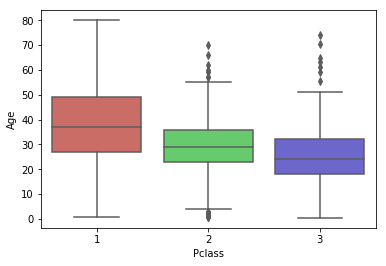

In [147]:
import seaborn as sb
sb.boxplot(x='Pclass',y='Age',data=titanic,palette='hls')#mean age of class1=37,class2=32,class3=27

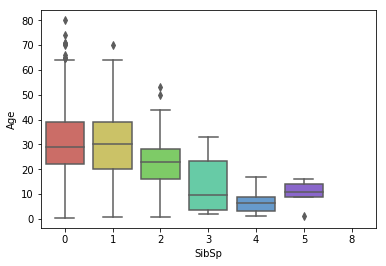

In [148]:
sb.boxplot(x='SibSp',y='Age',data=titanic,palette='hls')

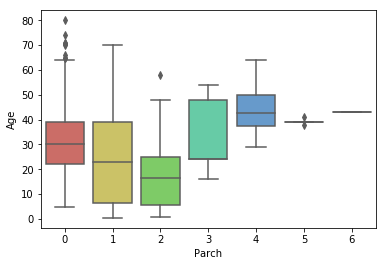

In [149]:
sb.boxplot(x='Parch',y='Age',data=titanic,palette='hls')

In [150]:
#Class is increasing age is decreasing,so we choose class.This is done because the data of the age is missing.

In [151]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
titanic['Age']=titanic[['Age','Pclass']].apply(age_approx,axis=1)        

In [152]:
titanic

,Passenger Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [153]:
titanic.isnull().sum()

Passenger Id      0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [154]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [155]:
titanic.isnull().sum()

Passenger Id    0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
dtype: int64

In [156]:
titanic.dropna(inplace=True,axis=0)

In [157]:
titanic.isnull().sum()

Passenger Id    0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [158]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [159]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)

In [160]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [161]:
titanic.drop(['Name','Ticket','Passenger Id'],axis=1,inplace=True)

In [162]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [163]:
dummy_titanic=pd.concat([titanic,gender,embark],axis=1)

In [164]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [166]:
dummy_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [170]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(dummy_titanic,test_size=0.3)

In [187]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
561,0,3,40.0,0,0,7.8958,1,0,1
216,1,3,27.0,0,0,7.9250,0,0,1
641,1,1,24.0,0,0,69.3000,0,0,0
627,1,1,21.0,0,0,77.9583,0,0,1
617,0,3,26.0,1,0,16.1000,0,0,1
209,1,1,40.0,0,0,31.0000,1,0,0
856,1,1,45.0,1,1,164.8667,0,0,1
72,0,2,21.0,0,0,73.5000,1,0,1
753,0,3,23.0,0,0,7.8958,1,0,1
405,0,2,34.0,1,0,21.0000,1,0,1


In [184]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
845,0,3,42.0,0,0,7.5500,1,0,1
765,1,1,51.0,1,0,77.9583,0,0,1
214,0,3,24.0,1,0,7.7500,1,1,0
692,1,3,24.0,0,0,56.4958,1,0,1
465,0,3,38.0,0,0,7.0500,1,0,1
162,0,3,26.0,0,0,7.7750,1,0,1
265,0,2,36.0,0,0,10.5000,1,0,1
17,1,2,29.0,0,0,13.0000,1,0,1
219,0,2,30.0,0,0,10.5000,1,0,1
409,0,3,24.0,3,1,25.4667,0,0,1


In [188]:
columns=train.shape[1]
x1=train.iloc[:,1:columns]
y1=train.iloc[:,0:1]

In [189]:
x1

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
561,3,40.0,0,0,7.8958,1,0,1
216,3,27.0,0,0,7.9250,0,0,1
641,1,24.0,0,0,69.3000,0,0,0
627,1,21.0,0,0,77.9583,0,0,1
617,3,26.0,1,0,16.1000,0,0,1
209,1,40.0,0,0,31.0000,1,0,0
856,1,45.0,1,1,164.8667,0,0,1
72,2,21.0,0,0,73.5000,1,0,1
753,3,23.0,0,0,7.8958,1,0,1
405,2,34.0,1,0,21.0000,1,0,1


In [190]:
y1

,Survived
561,0
216,1
641,1
627,1
617,0
209,1
856,1
72,0
753,0
405,0


In [191]:
columns=test.shape[1]
x2=test.iloc[:,1:columns]
y2=test.iloc[:,0:1]

In [192]:
x2

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
845,3,42.0,0,0,7.5500,1,0,1
765,1,51.0,1,0,77.9583,0,0,1
214,3,24.0,1,0,7.7500,1,1,0
692,3,24.0,0,0,56.4958,1,0,1
465,3,38.0,0,0,7.0500,1,0,1
162,3,26.0,0,0,7.7750,1,0,1
265,2,36.0,0,0,10.5000,1,0,1
17,2,29.0,0,0,13.0000,1,0,1
219,2,30.0,0,0,10.5000,1,0,1
409,3,24.0,3,1,25.4667,0,0,1


In [180]:
y

,Survived
845,0
765,1
214,0
692,1
465,0
162,0
265,0
17,1
219,0
409,0


In [193]:
from sklearn.linear_model import LogisticRegression

In [195]:
lr=LogisticRegression()
lr.fit(x1,y1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
y_pre=lr.predict(x2)

In [200]:
y_pre

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [201]:
y2=np.array(y2)

In [202]:
y2

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [203]:
type(y_pre)

numpy.ndarray

In [207]:
y2.shape

(267, 1)

In [208]:
y_pre.shape

(267,)

In [209]:
y_pre.reshape(267,1)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [212]:
count=0
for i in range(0,267):
    if(y2[i]==y_pre[i]):
        count+=1
    else:
        continue
    

In [213]:
count

212

In [215]:
perc=(212/267)*100

In [216]:
perc

79.40074906367042